# Drift Particle Swarm Optimization
**Particle Swarm Optimization(PSO)** is a sort of classic heuristic algorithm to solve nonlinear and nonconvex optimization problem. Just like Generatic Algorith (GA), Simulated Annealing Algorithm, etc. 

The PSO algorithm is known for its ease of understanding and ease of implementation. Howerver PSO also have many shortages like trapping in local optimization. Thus, many rearch about improment in PSO has implemented into more complex applications, such as **Multi-stage Portfolio Optimization Problem (MSPO)**. 

**DPSO(Drift Particle Swarm Optimiation)** is one of the improved PSO inpired by the motion of electrons in a conductor under electric field. Unlike PSO, DPSO is a global convergent algorithm and has strong search ability than PSO.

This article firstly introduce the classic PSO algorithm and how the DPSO improves it. Then, there is a simple test functuon for them to optimize and we can visually feel the trajectory of particle swarm motion of two algorithms.

## PSO
In the PSO with $m$ particles, each particle $i$ represents a potential solution of the given problem in *D-dimensional* space and has three vectors at the $k^{th}$ iteration, its current position $X_{i}^{k}=\left(X_{i, 1}^{k}, X_{i 2}^{k}, \ldots, X_{i D}^{k}\right)$, its velocity $V_{i}^{k}=\left(V_{i, 1}^{k}, V_{i, 2}^{k}, \ldots, V_{i, D}^{k}\right)$ and its **personal best position** (the position giving the best objective function value or fitness value)$P_{i}^{k}=\left(P_{i, 1}^{k}, P_{i, 2}^{k}, \ldots, P_{i D}^{k}\right)$ There is a vector $G^{k}=\left(G_{1}^{k}, G_{2}^{k}, \ldots, G_{D}^{k}\right)$ called **global best postion** which is defined as the position of the best particle among all the particles in the population. The particle in PSO moves according the following equation:
$$V_{i j}^{k+1}=w \cdot V_{i j}^{k}+c_{1} r_{i j}^{k}\left(X_{i j}^{k}-P_{i j}^{k}\right)+c_{2} R_{i j}^{k}\left(X_{i j}^{k}-G_{j}^{k}\right)$$

$$X_{i j}^{k+1}=X_{i j}^{k}+V_{i j}^{k+1}$$

where $c_1$ and $c_2$ are called acceleration coefficients, $w$ is the parameter which can be adjusted to the balance of **exploration and exploitation**, $r_{i j}^{k}, R_{i j}^{k} \sim U(0,1)$ are uniform random variables.

## DPSO
In fact, as the particles are coverging to their own local attractors, their current position, personal best positions are all converging to one point, leading the PSO algorithm to converge. The particle’s directional movement toward $p_i^k$ is somewhat like the drift motion of an election in a con- ductor under electric field. However, besides the drift motion caused by electric field, the electron is also in thermo motion which appears to be random movement.

We change the velocity update formula as foloows:
$$V_{i j}^{k+1}=\alpha \cdot\left|C_{j}^{k}-X_{i j}^{k}\right| \cdot \varphi_{i, j}^{k}+c_{1} r_{i j}^{k}\left(P_{i j}^{k}-X_{i j}^{k}\right)+c_{2} r_{i j}^{k}\left(G_{j}^{k}-X_{i j}^{k}\right)$$

where:

- $\phi_{i,j}^k$ is a random standard normal distribution

- $\sigma_{i j}^{k}=\alpha \cdot\left|C_{j}^{k}-X_{i j}^{k}\right|$ and $C_{j}^{k}=(1 / m) \sum_{i=1}^{m} P_{i j}^{k}(1 \leqslant j \leqslant D)$

- $\alpha$ is called compression-expansion coeffient.

and position update rule is the same as PSO:
$$X_{i, j}^{k+1}=X_{i, j}^{k}+V_{i, j}^{k+1}$$


It can be seen that the velocity update of the DPSO compared to the PSO has nothing to do with the trajectory, and it has increased its own degree of exploration.

## Test Function 
Now we use a test function as follows to exam the performance of two type PSO algorithm:

It is a two dimention optimization problem and this test funtion features a lot of local optimizations.

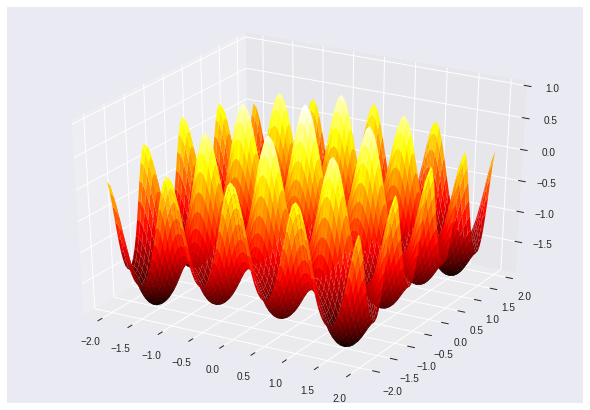

In [3]:
# plot the test funtion
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
plt.style.use('seaborn')
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-2, 2, 0.05)
Y = np.arange(-2, 2, 0.05)
X, Y = np.meshgrid(X, Y)
test_func = lambda X,Y: np.sin(np.sqrt(X**2+Y**2))/np.sqrt(X**2+Y**2)+np.exp((np.cos(2*np.pi*X)+np.cos(2*np.pi*Y))/2)-2.71289
Z = test_func(X, Y)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')

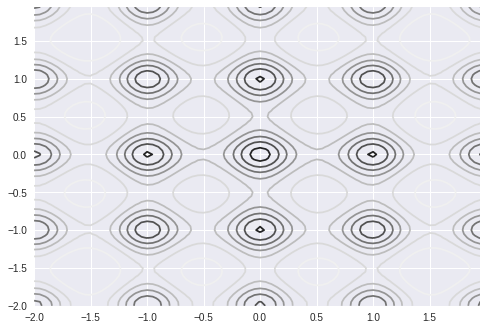

In [5]:
plt.contour(X, Y, Z)

### PSO (Python simple version)

In [32]:
N_iteration = 300
N_p = 30
px = np.random.uniform(X.min(), X.max(), size=(N_p,))
py = np.random.uniform(Y.min(), Y.max(), size=(N_p,))

c1 = 0.5
c2 = 0.01
w = 0.5
dim = 2
P = np.c_[px, py]
P_best = P
G_best = np.zeros(dim)

<IPython.core.display.Javascript object>


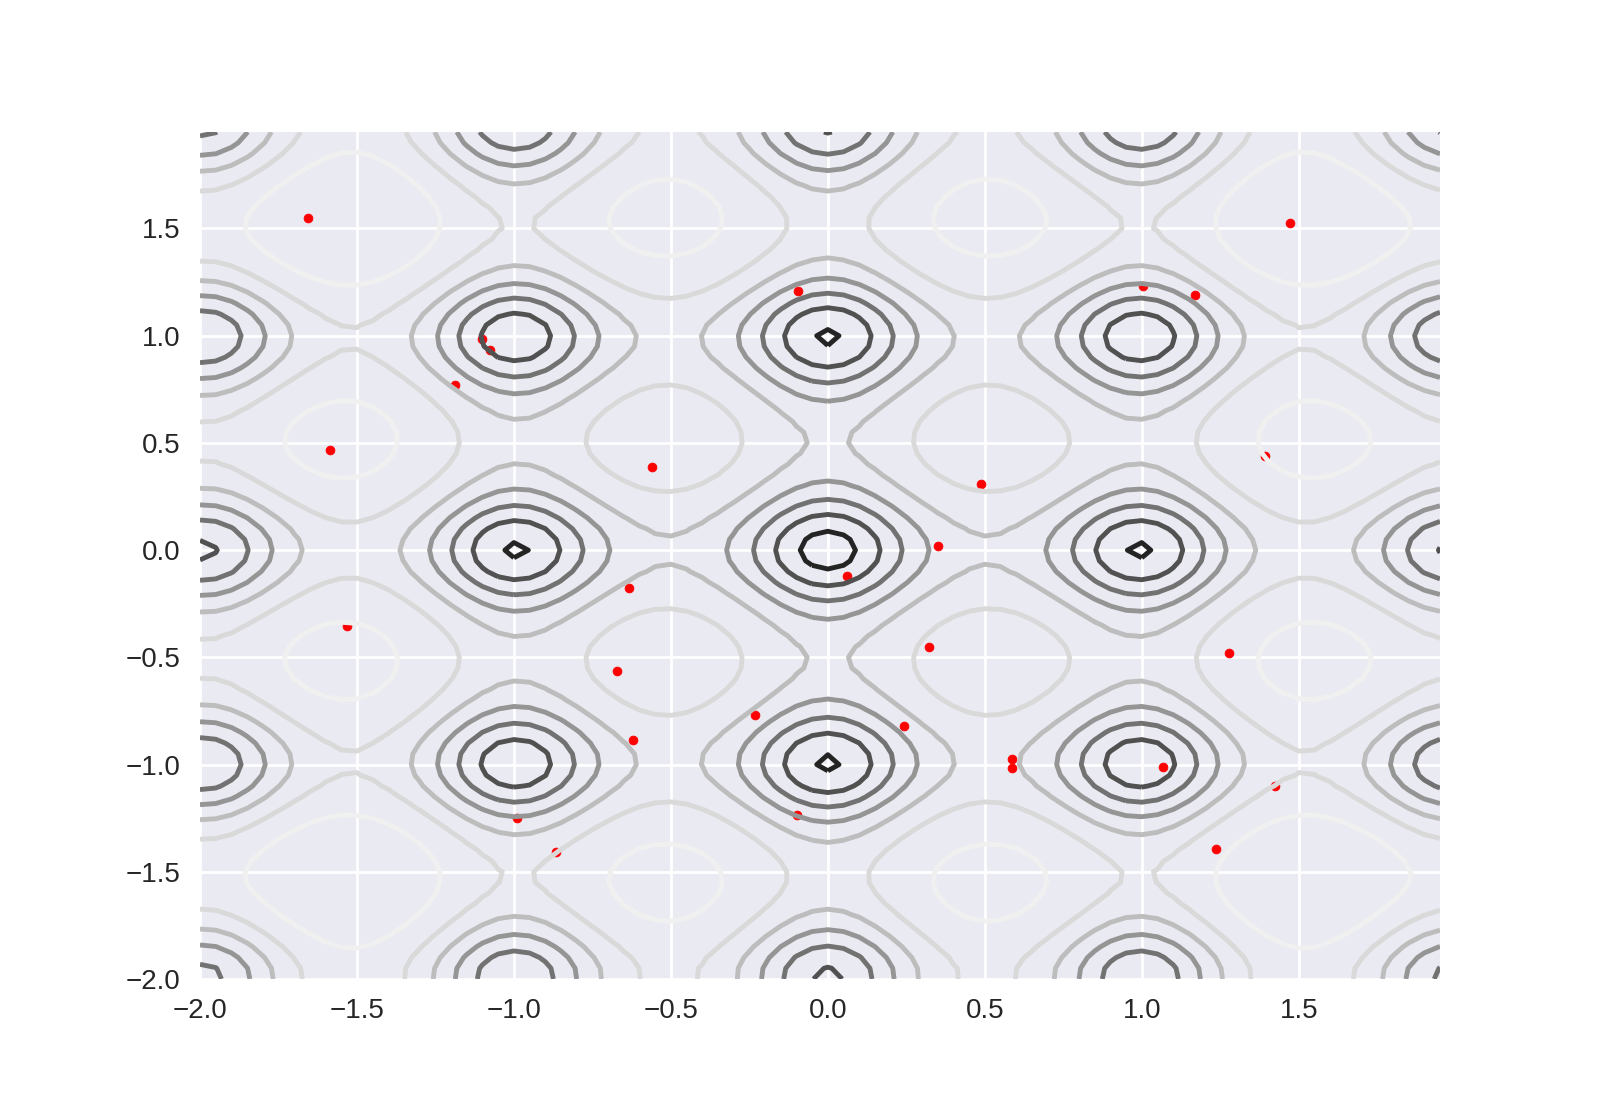

In [33]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
v = np.zeros((N_p, dim))
P_trace = []
fig, ax = plt.subplots()
ax.contour(X, Y, Z)
sca = ax.scatter(P[:, 0], P[:, 1], s=10, c='r')
def update(i):
    tr = P_trace[i]
    sca.set_offsets(tr)

for _ in range(N_iteration):
    func_value = test_func(P[:, 0], P[:, 1])
    global_ind = func_value.argmax()
    G_best = P[global_ind]
    for ind in range(N_p):
        r1, r2 = np.random.uniform(), np.random.uniform()
        v[ind] = w * v[ind] + c1 * r1 * (P_best[ind] - P[ind]) + \
                    c2 * r2 * (G_best - P[ind])
        P[ind] += v[ind]
        P_new_val = test_func(P[ind, 0], P[ind, 1])
        if P_new_val > func_value[ind]:
            P_best[ind] = P[ind]
    if _ % 4 == 0:
        P_trace.append(P.copy())
#     print(_, 'gloablbest', func_value[global_ind], G_best)
ani = animation.FuncAnimation(fig, update, frames=len(P_trace), interval=30, blit=True)
ani.save('pso.gif', writer='imagemagick', dpi=100)

### DPSO (simple python version)

<IPython.core.display.Javascript object>


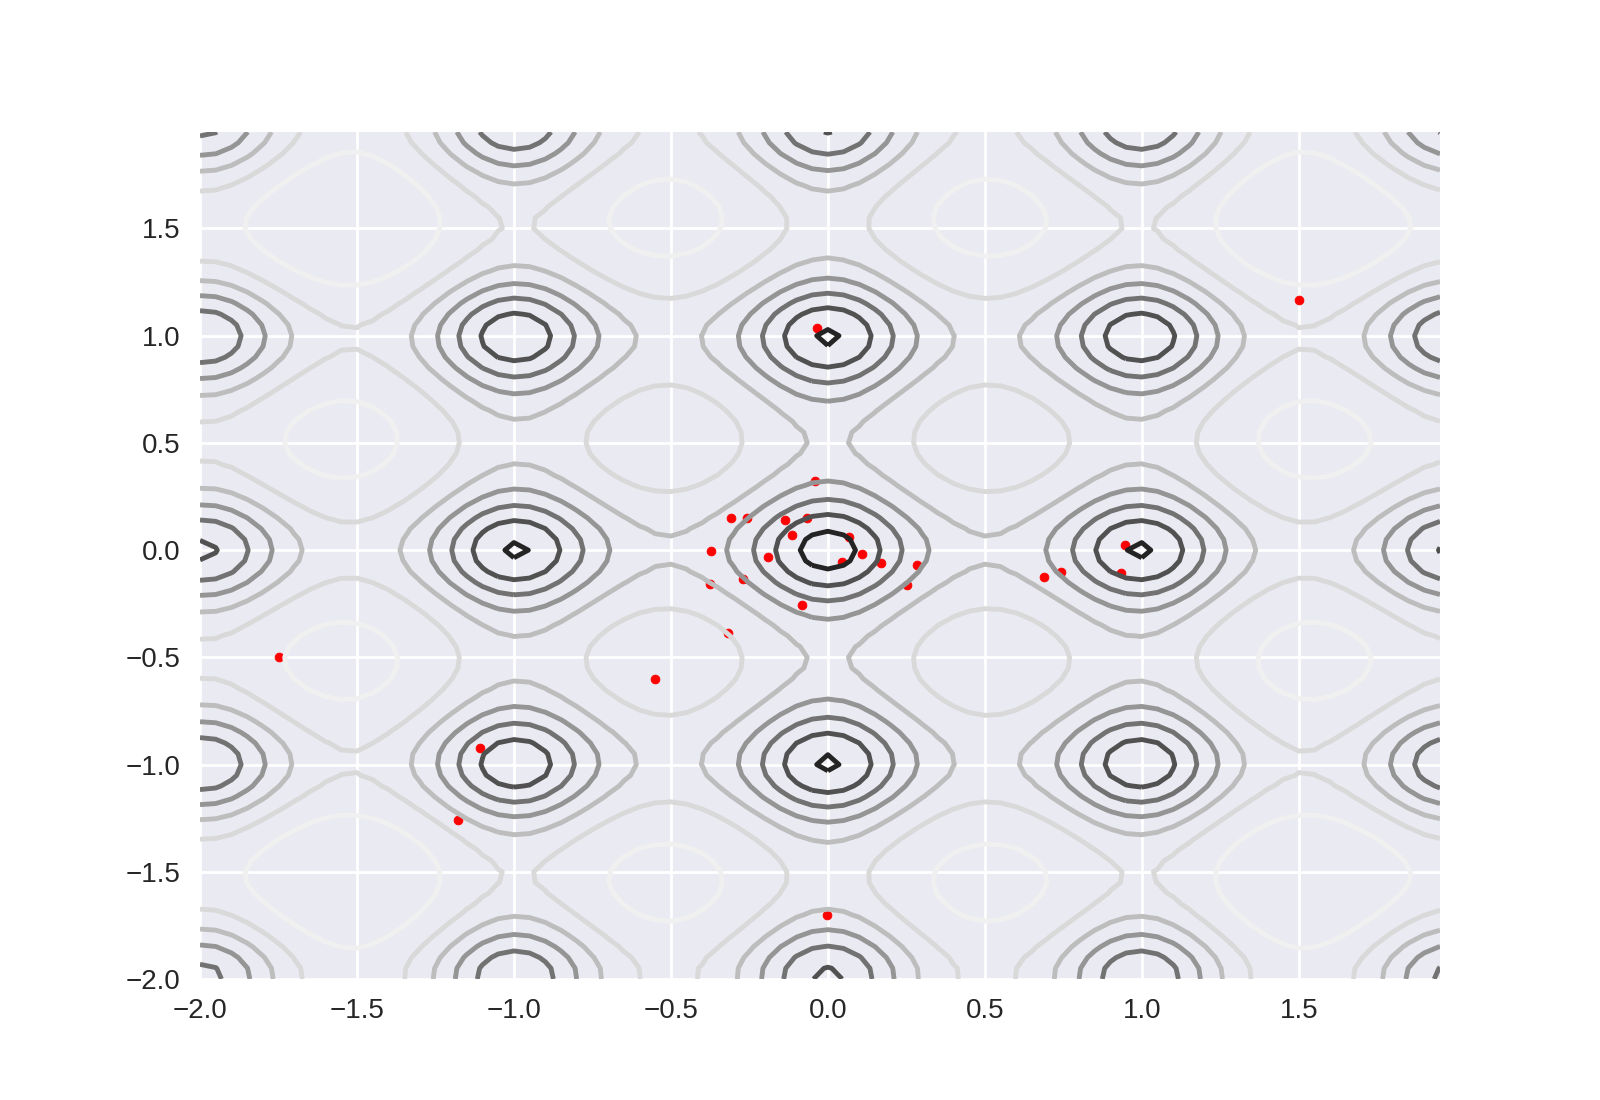

In [43]:
N_iteration = 320
N_p = 30
px = np.random.uniform(X.min(), X.max(), size=(N_p,))
py = np.random.uniform(Y.min(), Y.max(), size=(N_p,))

c1 = 0.5
c2 = 0.01
w = 0.5
dim = 2
P = np.c_[px, py]
P_best = P
G_best = np.zeros(dim)
# dpso
v = np.zeros((N_p, dim))
P_trace = []
fig, ax = plt.subplots()
ax.contour(X, Y, Z)
sca = ax.scatter(P[:, 0], P[:, 1], s=10, c='r')
alpha = 0.09
def update(i):
    tr = P_trace[i]
    sca.set_offsets(tr)

for _ in range(N_iteration):
    func_value = test_func(P[:, 0], P[:, 1])
    global_ind = func_value.argmax()
    G_best = P[global_ind]
    C = P_best.mean(axis=0)
    for ind in range(N_p):
        r1, r2 = np.random.uniform(), np.random.uniform()
        phi = np.random.normal()
        v[ind] = alpha * np.abs(C - P[ind]) * phi + c1 * r1 * (P_best[ind] - P[ind]) + \
                    + c2 * r2 * (G_best - P[ind])
        P[ind] += v[ind]
        P_new_val = test_func(P[ind, 0], P[ind, 1])
        if P_new_val > func_value[ind]:
            P_best[ind] = P[ind]
    if _ % 4 == 0:
        P_trace.append(P.copy())
ani = animation.FuncAnimation(fig, update, frames=len(P_trace), interval=20, blit=True)
ani.save('dpso.gif', writer='imagemagick', dpi=100)

## Reference
- Sun J, Fang W, Wu X, et al. Solving the multi-stage portfolio optimization problem with a novel particle swarm optimization[J]. Expert Systems with Applications, 2011, 38(6): 6727-6735.

- [pyswarm --one python version PSO algorithm testing framework](https://github.com/ljvmiranda921/pyswarms)

## Appendix

- [Chinese version]()

- [Origin jupyter notebook]()

<IPython.core.display.Javascript object>


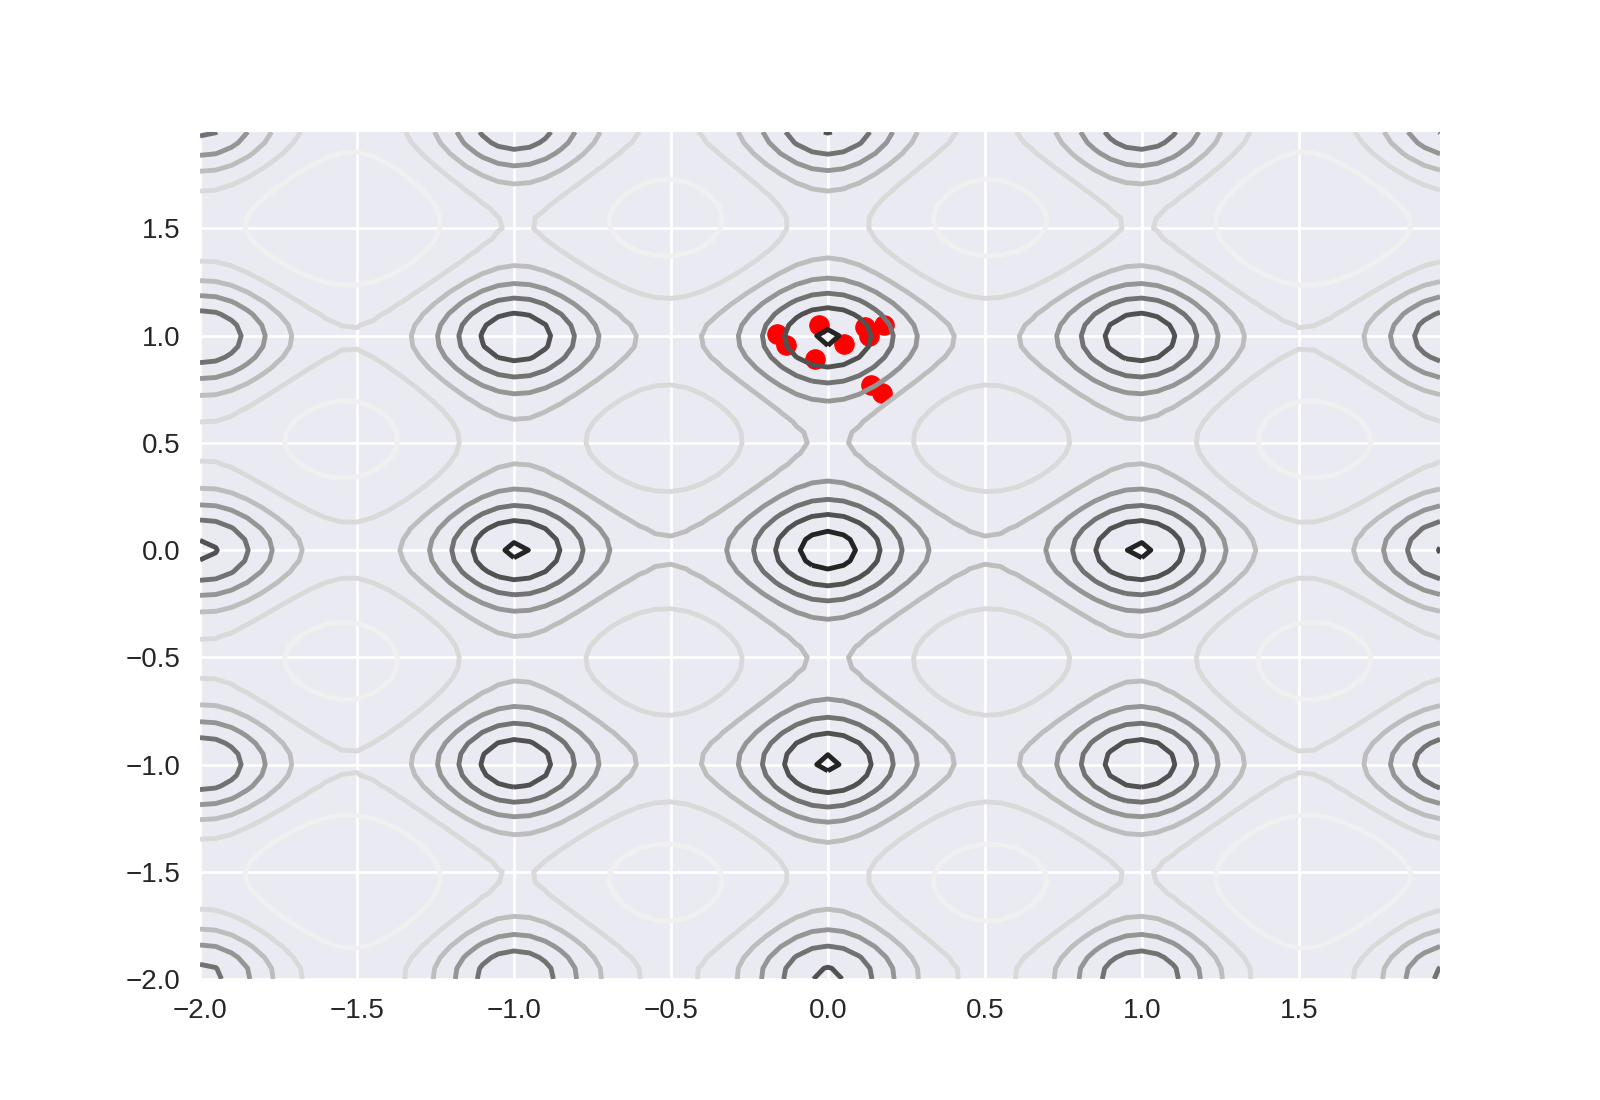

In [44]:
N_iteration = 300
N_p = 10
px = np.random.uniform(X.min(), X.max(), size=(N_p,))
py = np.random.uniform(Y.min(), Y.max(), size=(N_p,))

c1 = 0.5
c2 = 0.01
w = 0.5
dim = 2
P = np.c_[px, py]
P_best = P
G_best = np.zeros(dim)
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
v = np.zeros((N_p, dim))
P_trace = []
fig, ax = plt.subplots()
ax.contour(X, Y, Z)
sca = ax.scatter(P[:, 0], P[:, 1], s=50, c='r')
def update(i):
    tr = P_trace[i]
    sca.set_offsets(tr)

for _ in range(N_iteration):
    func_value = test_func(P[:, 0], P[:, 1])
    global_ind = func_value.argmax()
    G_best = P[global_ind]
    for ind in range(N_p):
        r1, r2 = np.random.uniform(), np.random.uniform()
        v[ind] = w * v[ind] + c1 * r1 * (P_best[ind] - P[ind]) + \
                    c2 * r2 * (G_best - P[ind])
        P[ind] += v[ind]
        P_new_val = test_func(P[ind, 0], P[ind, 1])
        if P_new_val > func_value[ind]:
            P_best[ind] = P[ind]
    if _ % 4 == 0:
        P_trace.append(P.copy())
#     print(_, 'gloablbest', func_value[global_ind], G_best)
ani = animation.FuncAnimation(fig, update, frames=len(P_trace), interval=30, blit=True)
ani.save('pso_local.gif', writer='imagemagick', dpi=100)

<IPython.core.display.Javascript object>


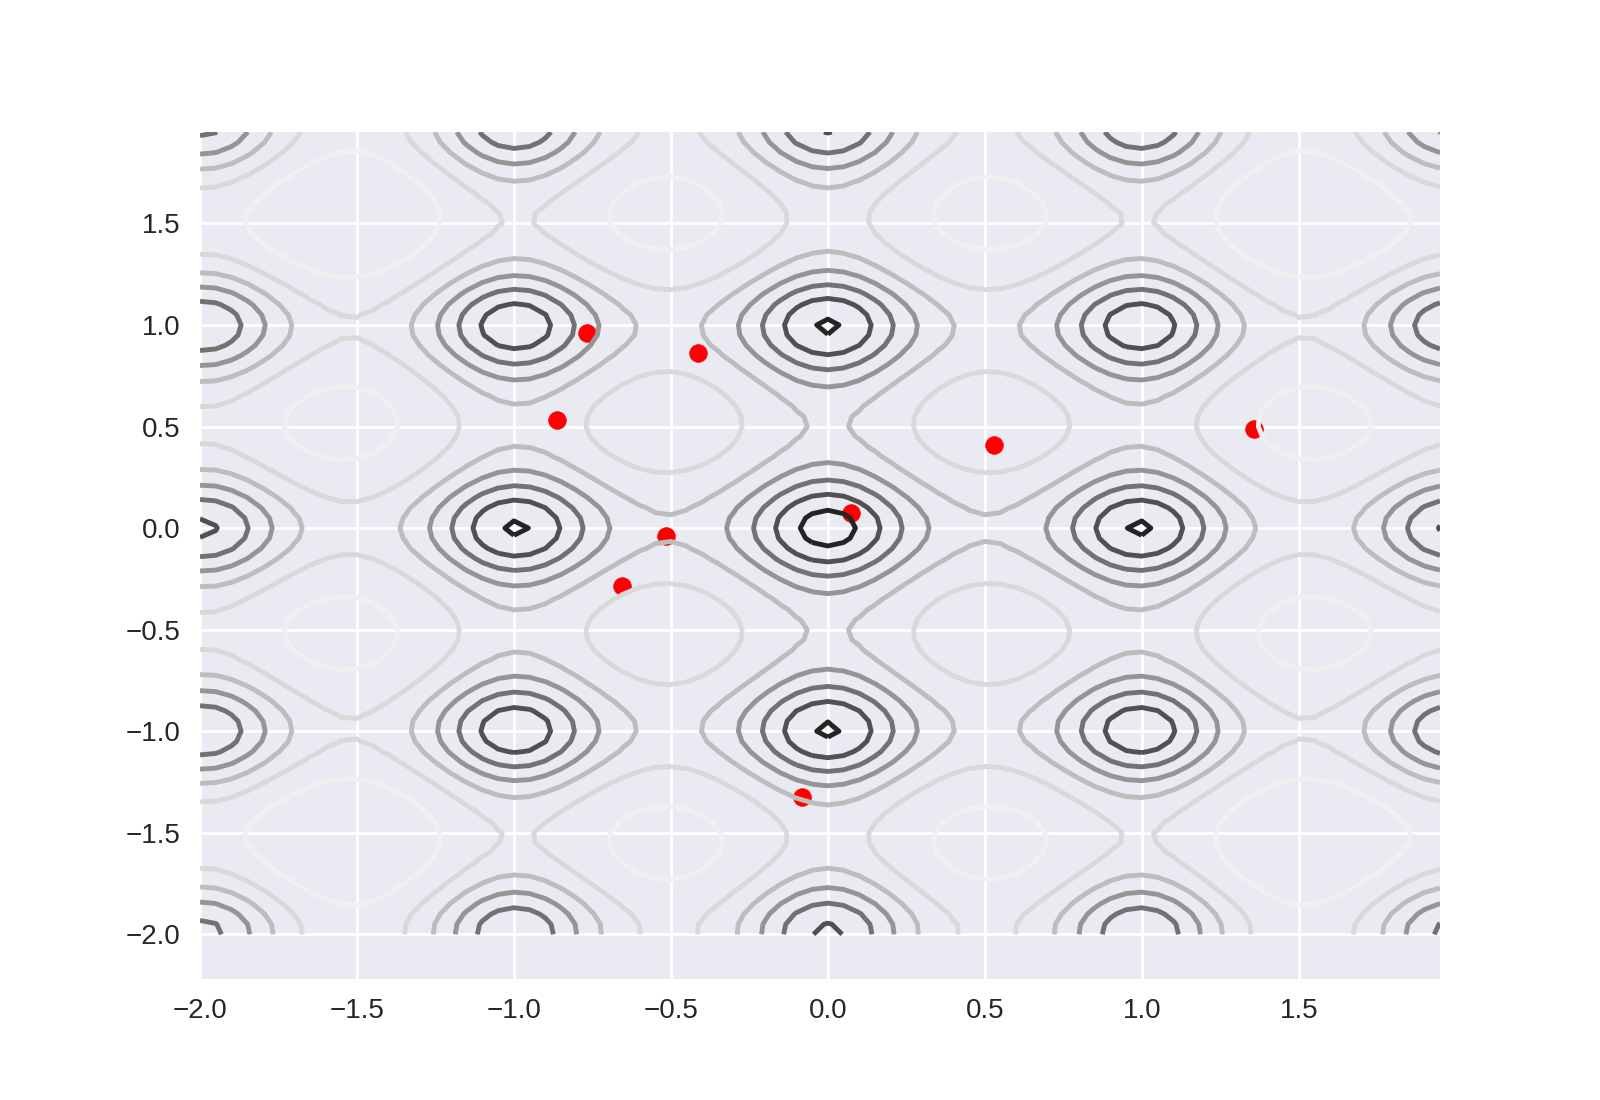

In [47]:
N_iteration = 320
N_p = 10
px = np.random.uniform(X.min(), X.max(), size=(N_p,))
py = np.random.uniform(Y.min(), Y.max(), size=(N_p,))

c1 = 0.5
c2 = 0.01
w = 0.5
dim = 2
P = np.c_[px, py]
P_best = P
G_best = np.zeros(dim)
# dpso
v = np.zeros((N_p, dim))
P_trace = []
fig, ax = plt.subplots()
ax.contour(X, Y, Z)
sca = ax.scatter(P[:, 0], P[:, 1], s=40, c='r')
alpha = 0.09
def update(i):
    tr = P_trace[i]
    sca.set_offsets(tr)

for _ in range(N_iteration):
    func_value = test_func(P[:, 0], P[:, 1])
    global_ind = func_value.argmax()
    G_best = P[global_ind]
    C = P_best.mean(axis=0)
    for ind in range(N_p):
        r1, r2 = np.random.uniform(), np.random.uniform()
        phi = np.random.normal()
        v[ind] = alpha * np.abs(C - P[ind]) * phi + c1 * r1 * (P_best[ind] - P[ind]) + \
                    + c2 * r2 * (G_best - P[ind])
        P[ind] += v[ind]
        P_new_val = test_func(P[ind, 0], P[ind, 1])
        if P_new_val > func_value[ind]:
            P_best[ind] = P[ind]
    if _ % 4 == 0:
        P_trace.append(P.copy())
ani = animation.FuncAnimation(fig, update, frames=len(P_trace), interval=20, blit=True)
ani.save('dpso_less.gif', writer='imagemagick', dpi=100)